In [18]:
from time import sleep
from typing import Counter
from igraph import *
import igraph as ig
import csv
import collections
import random

In [19]:
# read and create graph

inverse_indicies = None

# playersFilename jest w zasadzie niepotrzebne. Tylko do wyświetlenia nazwisk piłkarzy (a i tak tego nie zaimplementowałem)
playersFilename = "../../data/Players.csv"
edgesFilename = "../../scrapers/2019-2020-Ekstraklasa-StatsEdges.csv"

playersFilename = "../../data/samplePlayers"
edgesFilename = "../../data/sampleEdges"
#edgesFilename = "genedges"

def delete_comments(csvfile):
    for row in csvfile:
        raw = row.split('#')[0].strip()
        if raw:
            yield raw

def read_graph(players_file, edges_file):
    print('reading from file')
    players = []
    edges = []
    with open(players_file , 'r') as csvfile:
        csvreader = csv.reader(delete_comments(csvfile), delimiter=',')
        players = list(csvreader)

    with open(edges_file , 'r') as csvfile:
        csvreader = csv.reader(delete_comments(csvfile), delimiter=',')
        edges = list(csvreader)

    print('edges setup')
    edgevertices = list([edge[0] for edge in edges] + [edge[1] for edge in edges])

    print('edgevertices')
    edgevertices = list(dict.fromkeys(edgevertices))

    print('vertices')
    #vertices = list([player for player in players if player[0] in edgevertices])

    
    print('inverse_indicies')
    inverse_indicies = dict(zip(edgevertices, range(len(edgevertices))))

    g = Graph()

    g.add_vertices(len(edgevertices))
    print('no vertices   ' + str(len(edgevertices)))
    g.vs["id"] = [vertex for vertex in edgevertices]
    g.vs["label"] = g.vs["id"]
    g.vs["vertex_size"] = 8
    g.vs["newlpalabel"] = 0
    g.es["weight"] = 2
    g.vs["vertex_color"] = 0

    print("setting colors")
    for vert in g.vs:
        vert["vertex_color"] = f'rgb({random.randint(0, 255)}, {random.randint(0, 255)}, {random.randint(0, 255)})'
    g.vs["lpalabel"] = list(zip(range(len(edgevertices)), g.vs["vertex_color"]))

    print("adding edges")
    try:
        for edge in edges:
            #print(str(edge[0]) + " " + str(edge[1]))
            #edge1 = edge[0]
            #edge2 = edge[1]
            #i = i + 1
            g.add_edge(inverse_indicies[edge[0]], inverse_indicies[edge[1]])
    except:
        print("Error occured during graph creating")
        quit()

    g.es["weigth"] = 1
    print("graph created")
    return g

def create_dictionary(vertices):
    dictionary = dict(zip(vertices, range(len(vertices))))
    return dictionary

g = read_graph(playersFilename, edgesFilename)

reading from file
edges setup
edgevertices
vertices
inverse_indicies
no vertices   10
setting colors
adding edges
graph created


In [20]:
# set properties
#g.vs["id"] = [vertex for vertex in edgevertices]
g.vs["label"] = g.vs["id"]
g.vs["vertex_size"] = 8
#g.vs["name"] = [vertex[1] for vertex in vertices]
#g.vs["lpalabel"] = list(zip(g.vs["id"], range(len(edgevertices))))
g.vs["newlpalabel"] = 0
#g.es["weight"] = 2
#g.vs["vertex_color"] = 0

In [21]:
# set visual style

visual_style = {}
visual_style["vertex_size"] = g.vs["vertex_size"]
#visual_style["layout"] = g.layout("kamada_kawai")
#visual_style["layout"] = g.layout("lgl")
visual_style["layout"] = g.layout("drl")
visual_style["edge_width"] = g.es["weight"]
visual_style["vertex_color"] = g.vs["vertex_color"]
visual_style["vertex_size"] = 30
if len(g.vs) > 30:
    visual_style["bbox"] = (1000, 1000)
else:
    visual_style["bbox"] = (800, 800)

In [22]:
# execute algorithm

changed = True
max_iter = 20

neigh_labels = [None] * len(g.vs)

print("\n\n\nLABELING\n\n")

iter = 0

g.vs["label"] = g.vs["lpalabel"]
plot(g, **visual_style)

while changed == True and iter < max_iter:
    iter = iter + 1
    a = 1
    print("loop")
    changedthisiteration = False
    for vert in g.vs:

        neighbours = g.neighbors(vert)

        if(len(neighbours) > 0):

            vertidx = vert.index
            neigh_labels[vertidx] = []

            for neigh in neighbours:
                neigh_labels[vertidx].append(g.vs[neigh]["lpalabel"])

            counted = Counter(neigh_labels[vertidx])
            newlabel = counted.most_common()

            g.vs[vertidx]["vertex_size"] = 30
            if g.vs[vertidx]["lpalabel"] != newlabel[0][0]:

                g.vs[vertidx]["newlpalabel"] = newlabel[0][0]
                g.vs[vertidx]["vertex_size"] = 60
                changedthisiteration = True
    
    changed = changedthisiteration

    g.vs["lpalabel"] = g.vs["newlpalabel"]
    for vert in g.vs:
        vertidx = vert.index
        g.vs[vertidx]["vertex_color"] = g.vs[vertidx]["lpalabel"][1]
        g.vs[vertidx]["label"] = (g.vs[vertidx]["id"], g.vs[vertidx]["lpalabel"][0])

    visual_style["vertex_size"] = g.vs["vertex_size"]
    visual_style["vertex_color"] = g.vs["vertex_color"]







LABELING


loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop
loop


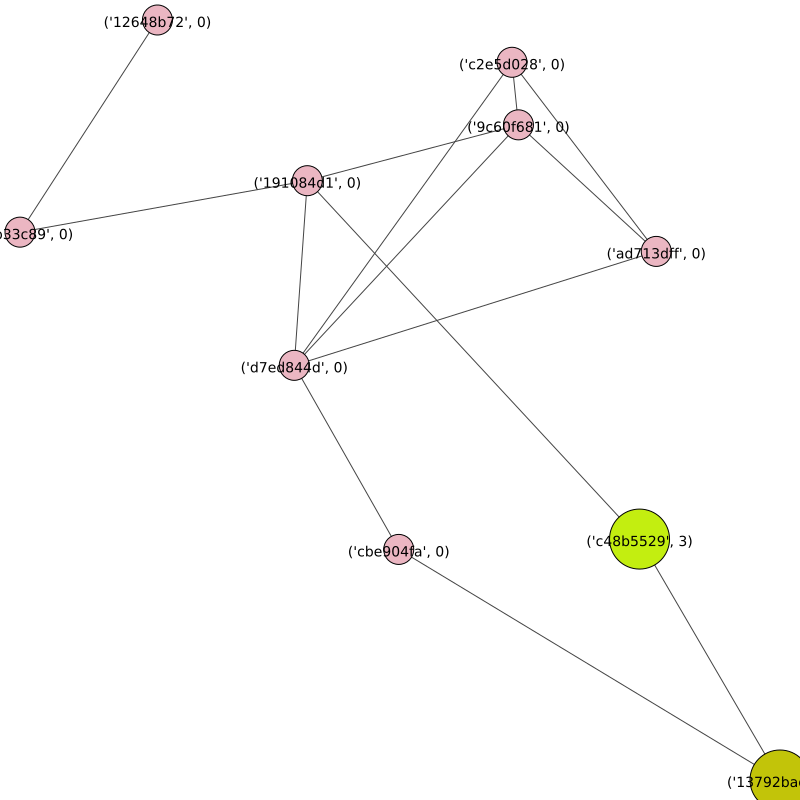

In [25]:
# plot
'''
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
fig, ax = plt.subplots()
ig.plot(g, target=ax)
'''

if len(g.vs) > 150:
    visual_style["bbox"] = (4000, 4000)

# plotuje w lepszy sposób, ale słabo działa w przglądarce
plot(g, **visual_style)